In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version은 코랩 명령입니다.
    %tensorflow_version 2.x
    !pip install -q -U tfx
    print("패키지 호환 에러는 무시해도 괜찮습니다.")
except Exception:
    pass

# 텐서플로 ≥2.0 필수
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "data"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Data description
The Boston data frame has 506 rows and 14 columns.

This data frame contains the following columns:

## crim
per capita crime rate by town.

## zn
proportion of residential land zoned for lots over 25,000 sq.ft.

## indus
proportion of non-retail business acres per town.

## chas
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

## nox
nitrogen oxides concentration (parts per 10 million).

## rm
average number of rooms per dwelling.

## age
proportion of owner-occupied units built prior to 1940.

## dis
weighted mean of distances to five Boston employment centres.

## rad
index of accessibility to radial highways.

## tax
full-value property-tax rate per \$10,000.

## ptratio
pupil-teacher ratio by town.

## black
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

## lstat
lower status of the population (percent).

## medv
median value of owner-occupied homes in \$1000s.

In [23]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [31]:
import numpy as np
import pandas as pd
pd.Series(train_data[:,0]).describe()
# plt.boxplot(train_data[:,0])

count    404.000000
mean       3.745111
std        9.240734
min        0.006320
25%        0.081437
50%        0.268880
75%        3.674808
max       88.976200
dtype: float64

In [8]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [22]:
train_data[:,0].shape

(404,)

In [11]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [15]:
import numpy as np
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
all_mae_histories = []
for i in  range(k):
    print("processing fold #", i)
    # 검증 데이터 분리
    val_data  = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    # 훈련 데이터 분리
    partial_train_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    # 모델 학습
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=1, verbose=0)

    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


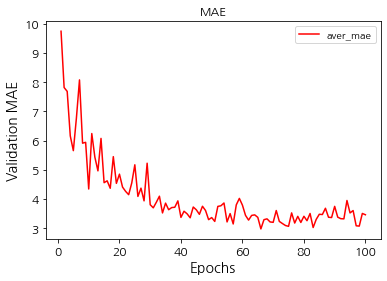

In [16]:
 
import matplotlib.pyplot as plt
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
plt.figure(1)
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history, 'r', label='aver_mae')
plt.title('MAE')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.legend()
plt.show()

In [17]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
average_mae_history

[9.746753573417664,
 7.820435285568237,
 7.688177227973938,
 6.166177988052368,
 5.659617364406586,
 6.778519988059998,
 8.081584930419922,
 5.915085554122925,
 5.944534420967102,
 4.347123444080353,
 6.245115160942078,
 5.437495708465576,
 4.967913746833801,
 6.078910827636719,
 4.562866032123566,
 4.626837968826294,
 4.37217903137207,
 5.454518795013428,
 4.5399304032325745,
 4.8550368547439575,
 4.413112282752991,
 4.266301691532135,
 4.1520756483078,
 4.554109334945679,
 5.175742149353027,
 4.0930368304252625,
 4.376212120056152,
 3.9411203861236572,
 5.229575574398041,
 3.809054911136627,
 3.7025617957115173,
 3.8942689895629883,
 4.100541710853577,
 3.5281066298484802,
 3.863266885280609,
 3.637873947620392,
 3.7114478945732117,
 3.722026288509369,
 3.940508544445038,
 3.3750815391540527,
 3.5860307216644287,
 3.498066782951355,
 3.36240017414093,
 3.730212092399597,
 3.634961187839508,
 3.480537176132202,
 3.756750226020813,
 3.6109743118286133,
 3.2980923652648926,
 3.369088530